## Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# !pip install xgboost
# !pip install imbalanced-learn

## Import data

In [2]:
df = pd.read_csv('Data/train.csv')

In [3]:
df.head()

,id,loc,v(g),ev(g),iv(g),n,v,l,d,i,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,0,22.0,3.0,1.0,2.0,60.0,278.63,0.06,19.56,14.25,...,17,1,1,0,16.0,9.0,38.0,22.0,5.0,False
1,1,14.0,2.0,1.0,2.0,32.0,151.27,0.14,7.00,21.11,...,11,0,1,0,11.0,11.0,18.0,14.0,3.0,False
2,2,11.0,2.0,1.0,2.0,45.0,197.65,0.11,8.05,22.76,...,8,0,1,0,12.0,11.0,28.0,17.0,3.0,False
3,3,8.0,1.0,1.0,1.0,23.0,94.01,0.19,5.25,17.86,...,4,0,2,0,8.0,6.0,16.0,7.0,1.0,True
4,4,11.0,2.0,1.0,2.0,17.0,60.94,0.18,5.63,12.44,...,7,0,2,0,7.0,6.0,10.0,10.0,3.0,False


## Check the Datatype of each attribute

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101763 entries, 0 to 101762
Data columns (total 23 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 101763 non-null  int64  
 1   loc                101763 non-null  float64
 2   v(g)               101763 non-null  float64
 3   ev(g)              101763 non-null  float64
 4   iv(g)              101763 non-null  float64
 5   n                  101763 non-null  float64
 6   v                  101763 non-null  float64
 7   l                  101763 non-null  float64
 8   d                  101763 non-null  float64
 9   i                  101763 non-null  float64
 10  e                  101763 non-null  float64
 11  b                  101763 non-null  float64
 12  t                  101763 non-null  float64
 13  lOCode             101763 non-null  int64  
 14  lOComment          101763 non-null  int64  
 15  lOBlank            101763 non-null  int64  
 16  lo

## Drop the "id" columns

In [5]:
df.drop('id', axis=1)

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,22.0,3.0,1.0,2.0,60.0,278.63,0.06,19.56,14.25,5448.79,...,17,1,1,0,16.0,9.0,38.0,22.0,5.0,False
1,14.0,2.0,1.0,2.0,32.0,151.27,0.14,7.00,21.11,936.71,...,11,0,1,0,11.0,11.0,18.0,14.0,3.0,False
2,11.0,2.0,1.0,2.0,45.0,197.65,0.11,8.05,22.76,1754.01,...,8,0,1,0,12.0,11.0,28.0,17.0,3.0,False
3,8.0,1.0,1.0,1.0,23.0,94.01,0.19,5.25,17.86,473.66,...,4,0,2,0,8.0,6.0,16.0,7.0,1.0,True
4,11.0,2.0,1.0,2.0,17.0,60.94,0.18,5.63,12.44,365.67,...,7,0,2,0,7.0,6.0,10.0,10.0,3.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101758,10.0,2.0,1.0,1.0,28.0,122.98,0.15,6.60,18.63,811.70,...,7,0,1,0,11.0,8.0,16.0,12.0,3.0,False
101759,27.0,5.0,4.0,1.0,107.0,559.93,0.06,18.00,34.17,11268.27,...,23,0,2,0,18.0,20.0,67.0,40.0,9.0,False
101760,26.0,1.0,1.0,1.0,83.0,360.17,0.04,22.75,12.56,5893.69,...,20,0,4,0,10.0,8.0,51.0,28.0,1.0,False
101761,10.0,2.0,1.0,2.0,43.0,191.76,0.15,6.46,29.53,1534.04,...,7,0,1,0,11.0,14.0,24.0,19.0,3.0,False


## Check out the amount of 'defects' column to see does 2 classes are balanced or imbalanced. (unit : %)

In [6]:
df['defects'].value_counts()/df['defects'].count()*100

defects
False    77.335574
True     22.664426
Name: count, dtype: float64

#### ==> Data in the 'defects' column is imbalanced.

In [7]:
# Step 1: encode data
# Encode dữ liệu nhằm mục đích đưa data về dạng numeric để tìm tính tương quan của các cột mà được đề cập ở cell dưới.
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['defects'] = le.fit_transform(df['defects'])
df.head()

,id,loc,v(g),ev(g),iv(g),n,v,l,d,i,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,0,22.0,3.0,1.0,2.0,60.0,278.63,0.06,19.56,14.25,...,17,1,1,0,16.0,9.0,38.0,22.0,5.0,0
1,1,14.0,2.0,1.0,2.0,32.0,151.27,0.14,7.00,21.11,...,11,0,1,0,11.0,11.0,18.0,14.0,3.0,0
2,2,11.0,2.0,1.0,2.0,45.0,197.65,0.11,8.05,22.76,...,8,0,1,0,12.0,11.0,28.0,17.0,3.0,0
3,3,8.0,1.0,1.0,1.0,23.0,94.01,0.19,5.25,17.86,...,4,0,2,0,8.0,6.0,16.0,7.0,1.0,1
4,4,11.0,2.0,1.0,2.0,17.0,60.94,0.18,5.63,12.44,...,7,0,2,0,7.0,6.0,10.0,10.0,3.0,0


In [8]:
# Kiểm tra tính tương quan của dữ liệu
corr = df.corr()
corr.defects.sort_values(ascending=False)

defects              1.000000
loc                  0.342642
branchCount          0.322827
v(g)                 0.301187
ev(g)                0.259928
n                    0.258080
lOBlank              0.257819
total_Opnd           0.252752
lOCode               0.250604
total_Op             0.250533
uniq_Opnd            0.246113
iv(g)                0.245618
d                    0.241936
b                    0.232594
v                    0.231179
i                    0.208577
lOComment            0.205402
uniq_Op              0.178474
locCodeAndComment    0.133150
t                    0.099592
e                    0.095366
id                   0.001976
l                   -0.253237
Name: defects, dtype: float64

<Axes: >

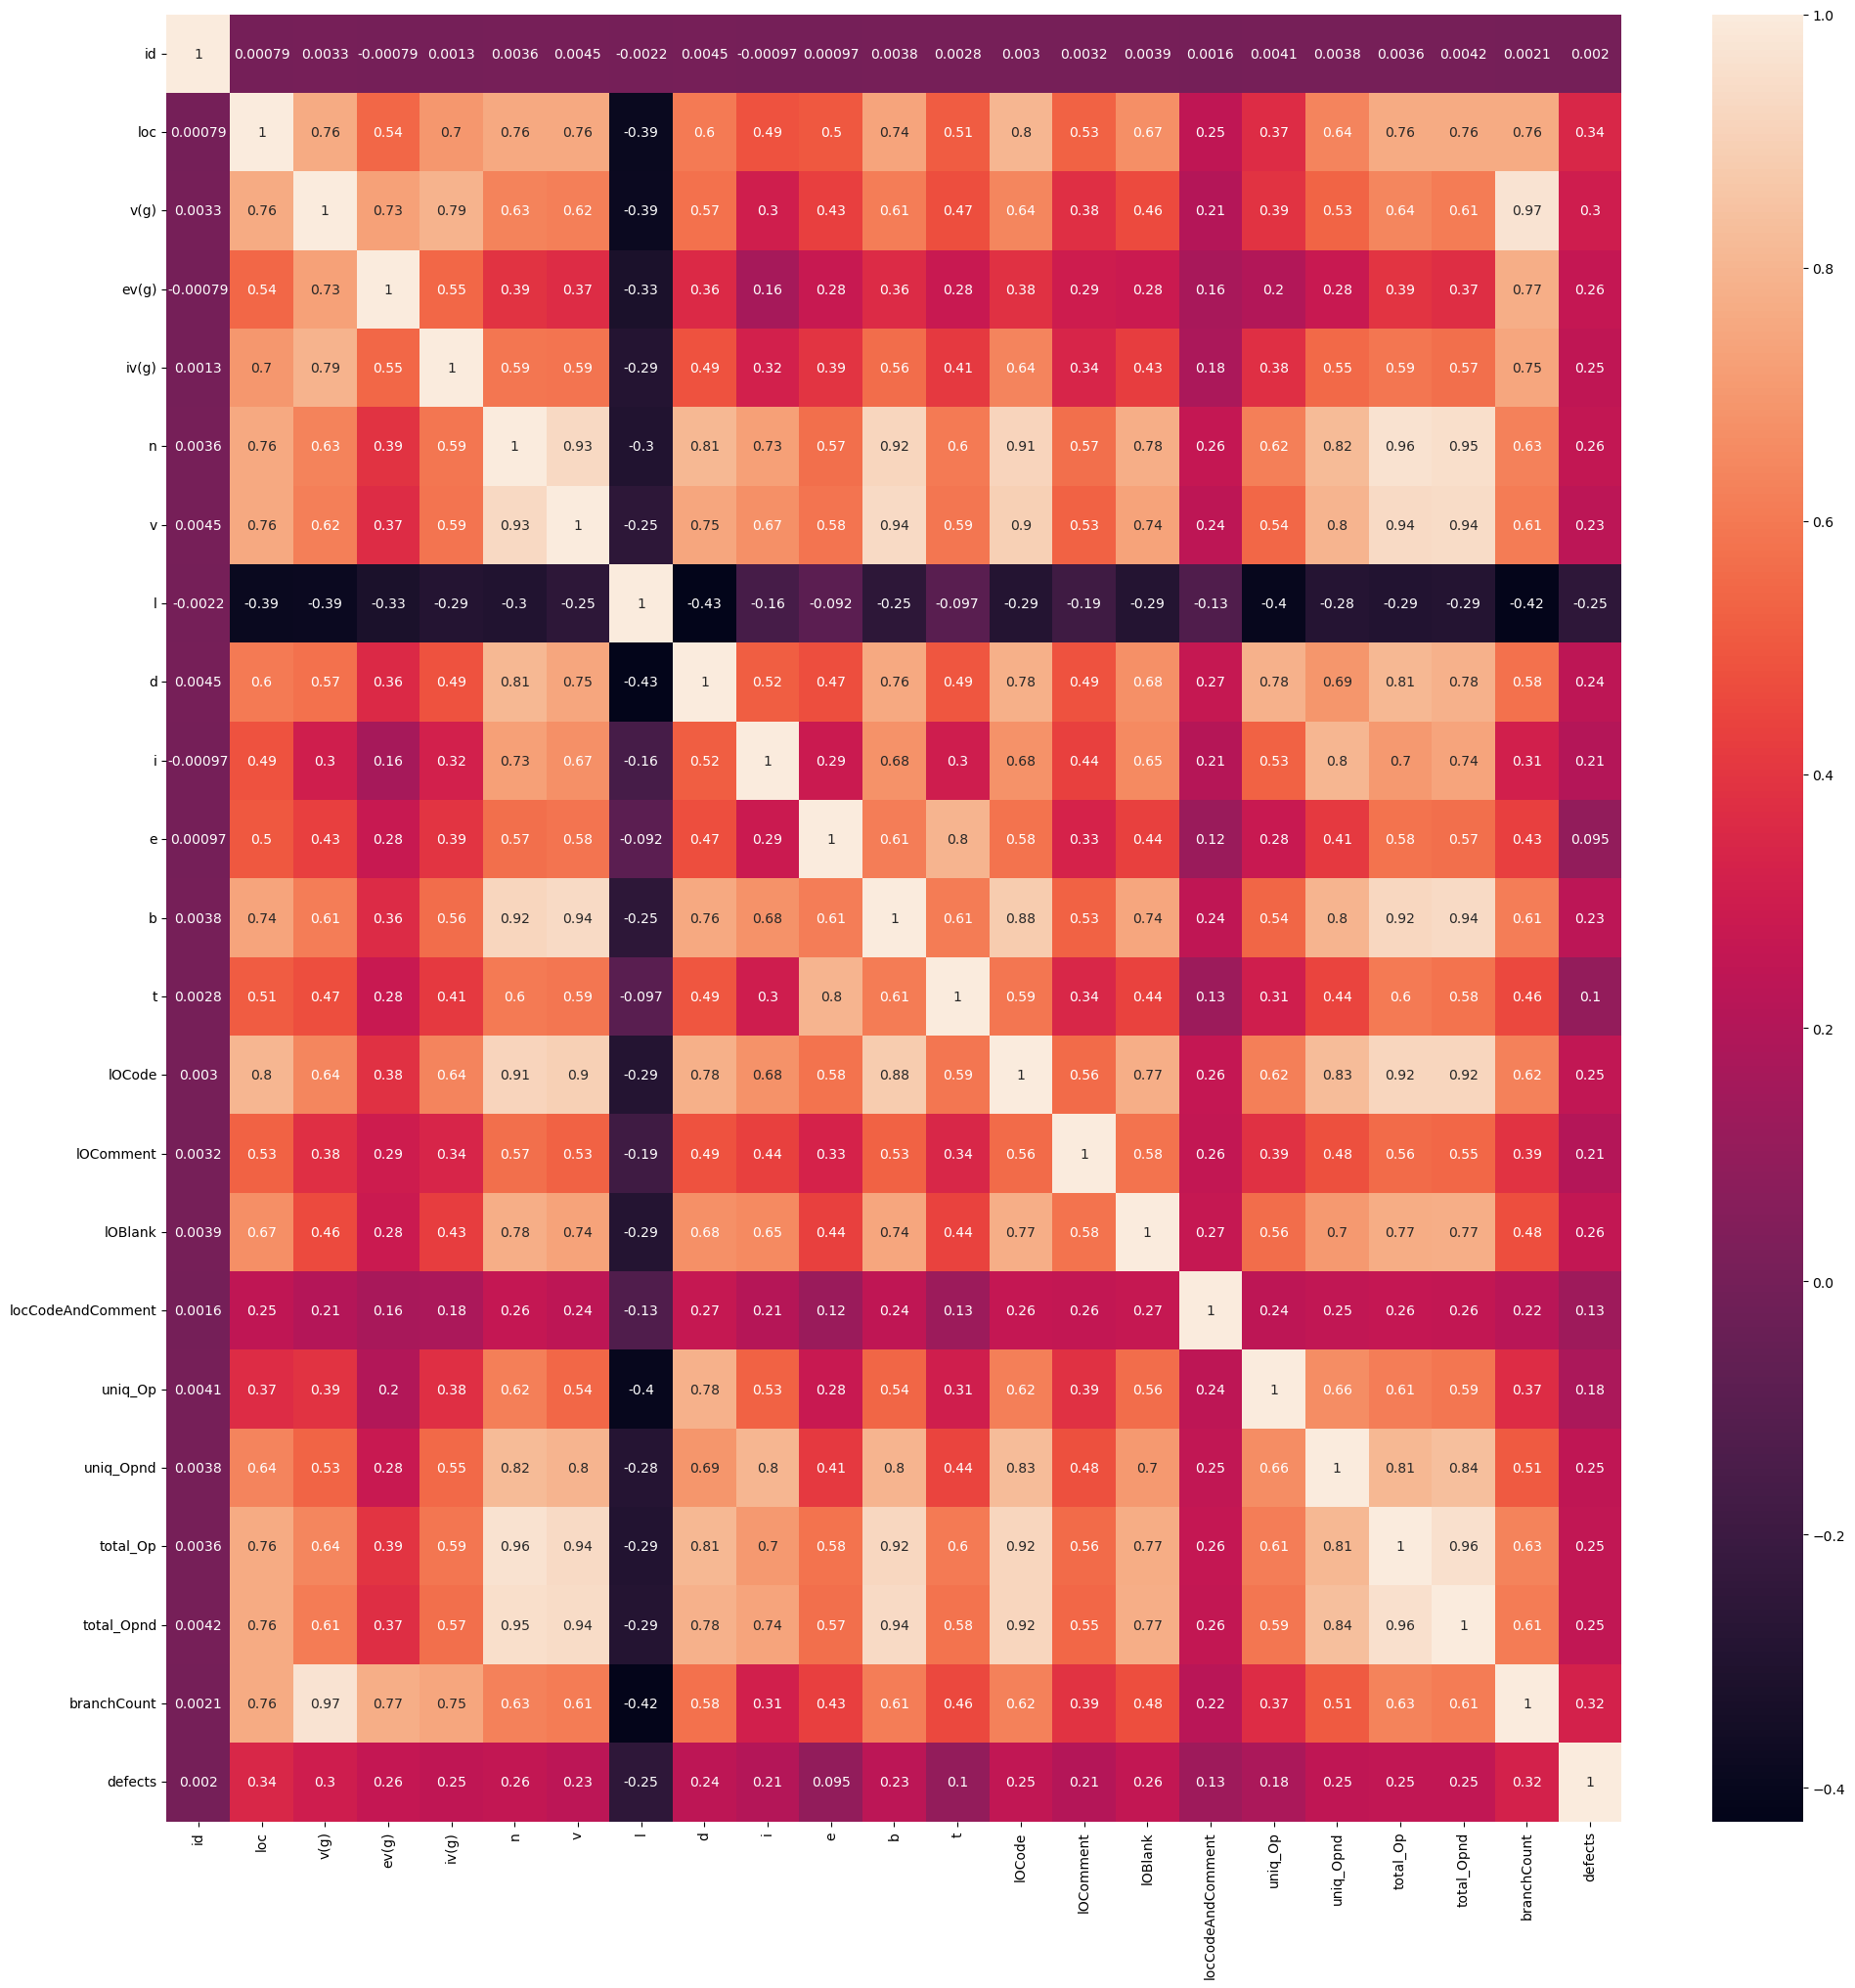

In [9]:
#biểu diễn biểu đồ nhiệt cho biến "corr"
plt.figure(figsize=(24,24))
sns.heatmap(corr, annot=True)

Case study #1: Training model without Handling Imbalanced Data using XGBoost (XGBClassifier)
Trường hợp thứ nhất: Huấn luyện model mà không qua quá trình xử lý "Mất cân bằng dữ liệu" dùng model XGBoost (XGBClassifier)

In [10]:
# Split data
X=df.drop(['defects'],axis=1)
y=df.defects
print(X)
print(y)

            id    loc  v(g)  ev(g)  iv(g)      n        v     l      d      i  \
0            0   22.0   3.0    1.0    2.0   60.0   278.63  0.06  19.56  14.25   
1            1   14.0   2.0    1.0    2.0   32.0   151.27  0.14   7.00  21.11   
2            2   11.0   2.0    1.0    2.0   45.0   197.65  0.11   8.05  22.76   
3            3    8.0   1.0    1.0    1.0   23.0    94.01  0.19   5.25  17.86   
4            4   11.0   2.0    1.0    2.0   17.0    60.94  0.18   5.63  12.44   
...        ...    ...   ...    ...    ...    ...      ...   ...    ...    ...   
101758  101758   10.0   2.0    1.0    1.0   28.0   122.98  0.15   6.60  18.63   
101759  101759   27.0   5.0    4.0    1.0  107.0   559.93  0.06  18.00  34.17   
101760  101760   26.0   1.0    1.0    1.0   83.0   360.17  0.04  22.75  12.56   
101761  101761   10.0   2.0    1.0    2.0   43.0   191.76  0.15   6.46  29.53   
101762  101762  136.0  18.0   18.0    1.0  296.0  1704.57  0.02  44.82  44.08   

        ...        t  lOCod

In [11]:
# Phân chia dữ liệu để thử train trong điều kiện data này đang trong tình trạng mất cân bằng
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,test_size=0.2,random_state=42)
Xtrain.shape, Xtest.shape, Ytrain.shape, Ytest.shape

((81410, 22), (20353, 22), (81410,), (20353,))

In [12]:
# Train model này với mô hình XGBoost. Ưu điểm của mô hình này là mô hình mạnh, có thể train được với tập dataset lớn
import xgboost as xgb
model_t = xgb.XGBClassifier()
model_t.fit(Xtrain, Ytrain)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [13]:
# Evaluate model by using "classification_report" function
# Tổng kết model bằng cách dùng hàm "classification_report" #--> đây là train trong điều kiện data đang bị mất cân bằng
from sklearn.metrics import classification_report
y_pred_proba = model_t.predict(Xtest)
print(classification_report(Ytest, y_pred_proba))

              precision    recall  f1-score   support

           0       0.84      0.93      0.88     15825
           1       0.62      0.38      0.47      4528

    accuracy                           0.81     20353
   macro avg       0.73      0.66      0.68     20353
weighted avg       0.79      0.81      0.79     20353



Text(50.722222222222214, 0.5, 'Predicted Data')

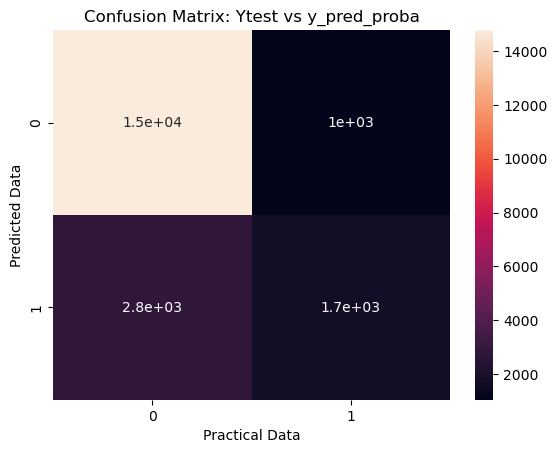

In [14]:
# Evaluate model after training without handling Imbalanced Data issue.
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(Ytest, y_pred_proba),annot=True)
plt.title('Confusion Matrix: Ytest vs y_pred_proba')
plt.xlabel('Practical Data')
plt.ylabel('Predicted Data')

Case Study #2: Training model by handling Imbalanced Data - and training model with XGBoost model.

## Nếu không qua quá trình xử lý imbalanced data thì recall và f1-score có accuracy thấp
## Xử lý imbalanced data bằng OverSampling

In [15]:
df['defects'].value_counts()

defects
0    78699
1    23064
Name: count, dtype: int64

## Random Oversampling

In [16]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()

X=df.drop(['defects'],axis=1)
y=df.defects

X_ros, y_ros = ros.fit_resample(X,y)
X_ros.shape, y_ros.shape

((157398, 22), (157398,))

## Train lại sau khi đã Balanced bằng Random Oversampling

In [17]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X_ros,y_ros,test_size=0.2,random_state=42)
Xtrain.shape, Xtest.shape, Ytrain.shape, Ytest.shape

((125918, 22), (31480, 22), (125918,), (31480,))

In [18]:
import xgboost as xgb
model_t = xgb.XGBClassifier()
model_t.fit(Xtrain, Ytrain)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [19]:
from sklearn.metrics import classification_report
y_pred_proba = model_t.predict(Xtest)
print(classification_report(Ytest, y_pred_proba))

              precision    recall  f1-score   support

           0       0.74      0.79      0.76     15637
           1       0.78      0.72      0.75     15843

    accuracy                           0.75     31480
   macro avg       0.76      0.75      0.75     31480
weighted avg       0.76      0.75      0.75     31480



Text(50.722222222222214, 0.5, 'Predicted Data')

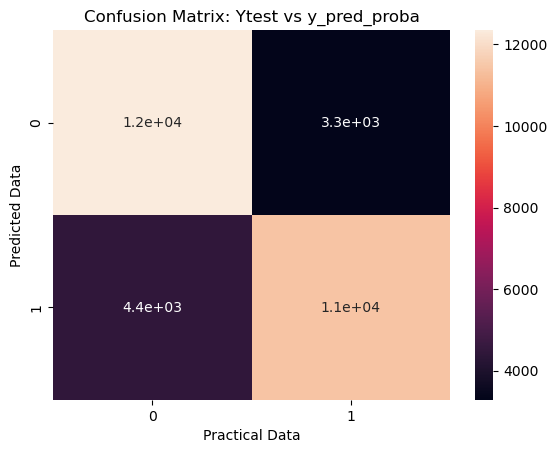

In [21]:
# Evaluate model after training without handling Imbalanced Data issue.
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(Ytest, y_pred_proba),annot=True)
plt.title('Confusion Matrix: Ytest vs y_pred_proba')
plt.xlabel('Practical Data')
plt.ylabel('Predicted Data')